In [107]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import copy

import seaborn as sns
sns.set(rc={'figure.figsize':(10, 7)})

In [108]:
N = 100 #số điểm dữ liệu mỗi cụm
u = 10 #mật độ phân tán
n = 3 #số cụm
X = []
cov = [[u, 0], [0, u]]
mean = []
for i in range(n):
  x_mean = np.random.randint(15, 65)
  y_mean = np.random.randint(15, 65)
  mean.append([x_mean, y_mean])
for i in mean:
  X.append(np.random.multivariate_normal(i, cov, N))
X = np.concatenate(X, axis = 0)
df = pd.DataFrame(X, columns=["x","y"])
df.T

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
x,17.286566,16.289956,24.164385,18.649892,19.587529,19.041570,16.181741,18.670584,15.060286,20.031388,...,34.868066,36.299735,39.695299,37.291213,31.302617,35.642218,41.543327,44.817912,34.424501,32.536317
y,39.521435,36.235899,41.138782,41.174072,44.248660,46.493149,34.183885,40.239179,41.513845,39.464755,...,24.299353,24.427614,21.982106,28.081611,24.186806,23.386668,22.159002,22.584078,24.981899,18.912933


In [109]:

df = pd.DataFrame({
    'x': np.random.randint(0,70, size=100),
    'y': np.random.randint(0,70, size=100)
    })
df.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
x,51,47,38,1,7,54,22,42,22,32,...,61,21,65,18,24,48,1,19,46,24
y,60,52,38,14,12,51,9,8,69,17,...,39,23,60,2,59,66,64,6,62,14


In [110]:
# Tạo dữ liệu 
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72, 40 ,62, 14, 74, 34, 42, 55, 7],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 60, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24, 33, 55, 25, 33, 19, 17, 40, 17]
})
df.T

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
x,12,20,28,18,29,33,24,45,45,52,...,69,72,40,62,14,74,34,42,55,7
y,39,36,30,52,54,46,55,59,60,70,...,7,24,33,55,25,33,19,17,40,17


# Phương pháp Elbow chọn số K 

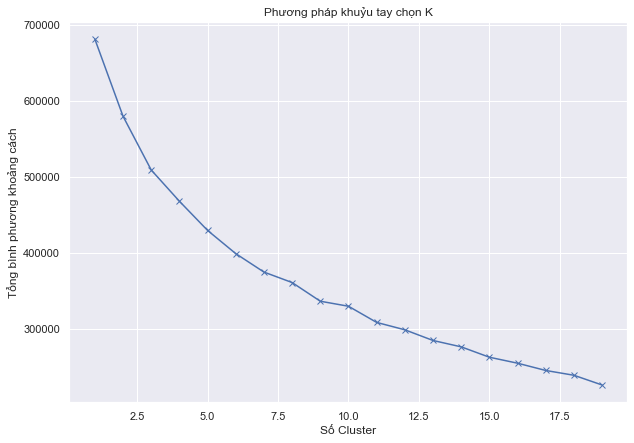

In [137]:
def elbow():
    K = range(1,20)
    Sum_of_squared_distances = []
    for i in K:
        km = KMeans(n_clusters=i)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('Số Cluster')
    plt.ylabel('Tổng bình phương khoảng cách')
    plt.title('Phương pháp khuỷu tay chọn K')
    plt.show()
    return
elbow()

In [112]:
# Số cluster 
k = 3

In [113]:
colors = cm.rainbow(np.linspace(0, 1, k))
colors

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

In [114]:
# Chọn ngẫu nhiên K điểm center từ data
def create_center(k):
    r = []
    for i in range(k): r.append(np.random.randint(0, len(df)))
    print(r)
    centroids = {
        i+1: [df['x'][r[i]], df['y'][r[i]]]
        for i in range(k)
    }
    #print(centroids)
    return centroids

In [115]:
centroids = create_center(k)
centroids

[14, 9, 17]


{1: [55, 14], 2: [52, 70], 3: [69, 7]}

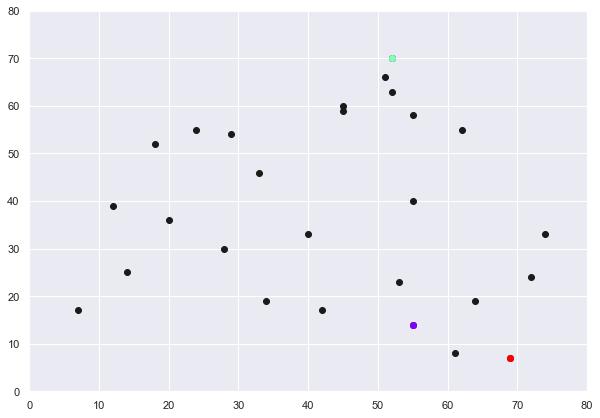

In [116]:
# Vẽ biểu đồ 
plt.scatter(df['x'], df['y'], color='k')
# Vẽ biểu đồ với 3 điểm center
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colors[i-1])

plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()
#ax.legend(fontsize='small')

In [117]:
# Hàm tính khoảng cách từ mỗi điểm dữ liệu đến mỗi center
def assigment(df, centroids):
    for i in centroids.keys():
        #sqrt((x1-x2)^2 - (y1-y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0])**2 +
                (df['y'] - centroids[i][1])**2
            )  
        )     
    centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroids_distance_cols].idxmin(axis=1) # Tìm cluter center gần nhất 
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_'))) # Bỏ đi các ký tự distance_from_
    df['color'] = df['closest'].map(lambda x: colors[x-1]) # Set màu tương tự center
    return df
    
df = assigment(df, centroids)
print(df)

     x   y  distance_from_1  distance_from_2  distance_from_3  closest  \
0   12  39        49.739320        50.606324        65.368188        1   
1   20  36        41.340053        46.690470        56.938563        1   
2   28  30        31.384710        46.647615        47.010637        1   
3   18  52        53.037722        38.470768        68.014704        2   
4   29  54        47.707442        28.017851        61.717096        2   
5   33  46        38.832976        30.610456        53.075418        2   
6   24  55        51.400389        31.764760        65.795137        2   
7   45  59        46.097722        13.038405        57.271284        2   
8   45  60        47.074409        12.206556        58.180753        2   
9   52  70        56.080300         0.000000        65.253352        2   
10  51  66        52.153619         4.123106        61.684682        2   
11  52  63        49.091751         7.000000        58.523500        2   
12  55  58        44.000000        12.

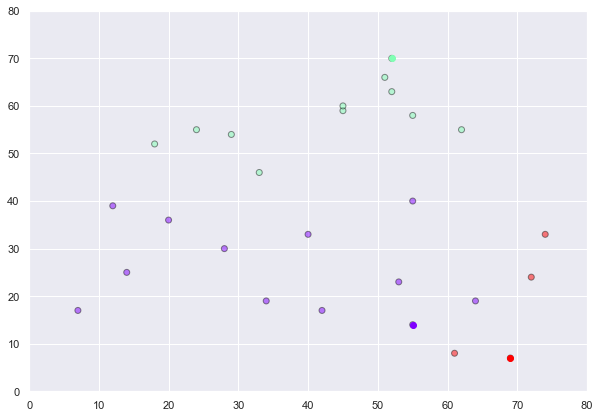

In [118]:
def plot_show():
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colors[i-1])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    plt.show()
plot_show()

In [119]:
old_centroids = copy.deepcopy(centroids)

# Update tọa độ mỗi center sau mỗi vòng lặp 
def update():
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return centroids

update()
print(centroids)

{1: [35.333333333333336, 26.0], 2: [42.36363636363637, 58.0], 3: [69.0, 18.0]}


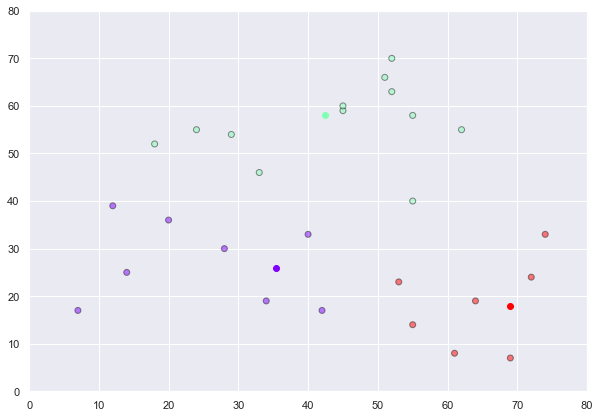

{1: [24.625, 27.0], 2: [43.416666666666664, 56.5], 3: [64.0, 18.285714285714285]}


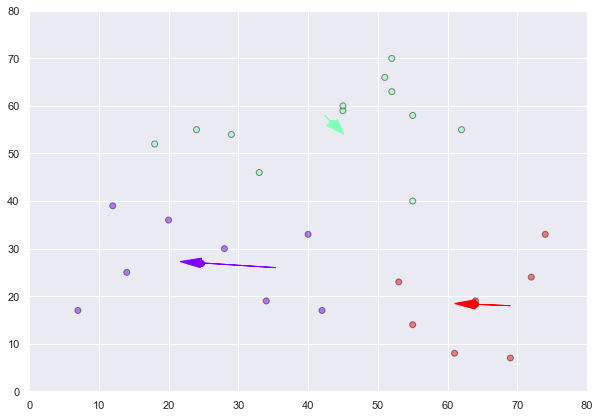

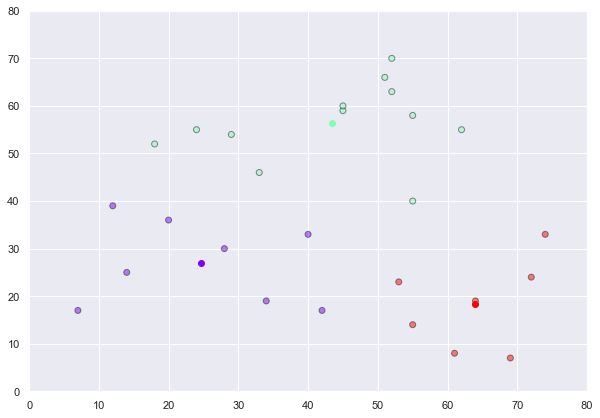

{1: [24.625, 27.0], 2: [43.416666666666664, 56.5], 3: [64.0, 18.285714285714285]}


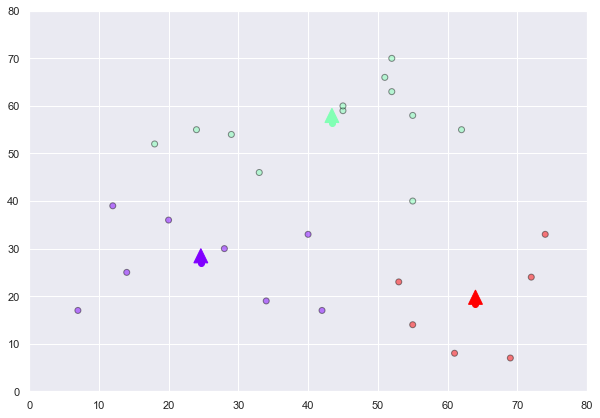

2

In [120]:
# Chạy K_means_clustering => điều kiện dừng khi tọa độ old_center = new_center
n = 0
while old_centroids != centroids:
    n = n +1
    df = assigment(df, centroids)
    #print(df)
    old_centroids = copy.deepcopy(centroids)
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colors[i-1])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    plt.show()
    ax = plt.axes()
    update()
    print(centroids)
    
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colors[i-1])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    for i in old_centroids.keys():
        old_x = old_centroids[i][0]
        old_y = old_centroids[i][1]
        dx = centroids[i][0] - old_centroids[i][0]
        dy = centroids[i][1] - old_centroids[i][1]  
        ax.arrow(old_x, old_y, dx, dy,head_width=2, head_length=3,  fc=colors[i-1], ec=colors[i-1])
    plt.show()
n 

----
# K Means Clutering trong dữ liệu đa chiều

In [135]:
d = 8 # số chiều
df = {
    i+1 : np.random.randint(0,100, size=100)
    for i in range(d)
}
df = pd.DataFrame(df)
df.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1,9,30,52,42,99,98,76,39,35,68,...,66,79,50,44,4,4,59,14,6,50
2,53,41,41,47,30,35,10,23,43,10,...,77,38,99,87,79,74,12,85,78,98
3,44,21,21,52,10,19,28,23,89,29,...,66,61,94,67,93,19,4,77,99,53
4,94,59,55,19,43,29,68,0,59,20,...,27,6,49,64,16,50,33,25,44,45
5,64,38,82,29,0,67,53,68,15,20,...,54,16,80,88,70,75,21,8,0,26
6,12,62,0,44,90,44,86,86,89,42,...,47,46,50,31,4,92,52,5,55,33
7,24,67,25,87,90,63,66,34,2,45,...,65,49,30,61,96,78,60,41,14,13
8,45,67,30,90,94,39,24,60,26,84,...,13,21,16,48,12,46,32,53,13,95


In [138]:
# Số cluster 
k = 10

In [139]:
def center_array(D,row):
    x = []
    for d in range(D): x.append(df[d+1][row])
    return x

In [140]:
def create_center(k):
    r =  np.random.randint(0, len(df), size = k)
    #r = [10,3,12,32]
    print(r)
    centroids = {
        i+1: center_array(d,r[i])
        for i in range(k)
    }
    #print(centroids)
    return centroids

In [141]:
centroids = create_center(k)
centroids

[82 29  4 42 59 32 89 65 91 53]


{1: [2, 26, 80, 98, 2, 87, 88, 79],
 2: [99, 90, 57, 14, 44, 50, 50, 24],
 3: [99, 30, 10, 43, 0, 90, 90, 94],
 4: [55, 87, 96, 92, 91, 7, 38, 50],
 5: [21, 68, 96, 13, 13, 22, 24, 36],
 6: [76, 13, 69, 37, 67, 2, 42, 53],
 7: [74, 48, 1, 32, 64, 78, 87, 2],
 8: [65, 25, 84, 10, 17, 92, 13, 86],
 9: [79, 38, 61, 6, 16, 46, 49, 21],
 10: [59, 27, 66, 44, 8, 87, 83, 79]}

### Lí thuyết
**Theo tiên đề Eculic về khoảng cách giữa 2 điểm trong không gian đa chiều**
- Công thức tính khoảng cách 2 giữa 2 điểm $A(p_{1}, p_{2},...p_{n}), B(q_{1}, q_{2},...q{n})$ 
    - distance_AB = $\sqrt{(p_{1} - q_{1})^2 + (p_{2} - q_{2})^2 + ... + (p_{n} - q_{n})^2}$ 

In [142]:
def distance_center(cluter):
    distance = 0
    for i in range(d-1):
        distance = distance + (df[i+1] - centroids[cluter][i])**2
    return np.sqrt(distance)

In [143]:
# Hàm tính khoảng cách từ mỗi điểm dữ liệu đến mỗi center
def assigment(df, centroids):
    for i in centroids.keys():
        # Theo Eculic
        df['distance_from_{}'.format(i)] = (
            distance_center(i)  
        )     
    centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroids_distance_cols].idxmin(axis=1) # Tìm cluter center gần nhất 
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_'))) # Bỏ đi các ký tự distance_from_
    return df   
df = assigment(df, centroids)
df

,1,2,3,4,5,6,7,8,distance_from_1,distance_from_2,distance_from_3,distance_from_4,distance_from_5,distance_from_6,distance_from_7,distance_from_8,distance_from_9,distance_from_10,closest
0,9,53,44,94,64,12,24,45,125.119942,136.227750,164.079249,83.246622,111.063045,101.960777,135.159165,145.965749,131.312604,135.653972,4
1,30,41,21,59,38,62,67,67,91.504098,104.651804,89.532117,127.003937,112.361025,103.701495,66.678332,110.036358,88.786260,71.189887,7
2,52,41,21,55,82,0,25,30,161.223447,110.254252,147.118999,97.046381,119.687092,67.126746,108.231234,138.751577,108.567951,137.113092,6
3,42,47,52,19,29,44,87,90,107.912001,82.328610,94.042544,129.027129,86.965510,90.321647,78.587531,100.209780,57.593402,61.773781,9
4,99,30,10,43,0,90,90,94,131.783914,108.563346,0.000000,181.262241,158.028478,137.375398,73.484692,118.186294,91.142745,69.771054,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4,74,19,50,75,92,78,46,117.418057,124.619421,129.861465,139.799857,138.863242,145.031031,81.375672,139.771242,130.610107,109.626639,7
96,59,12,4,33,21,52,60,32,125.761679,107.177423,69.606034,158.098071,125.315602,97.319063,69.173694,104.685243,72.360210,78.185676,7
97,14,85,77,25,8,5,41,53,133.910418,105.702412,157.330862,115.918075,38.026307,112.814006,146.201915,122.102416,94.127573,119.829045,5
98,6,78,99,44,0,55,14,13,111.807871,121.301278,160.860188,126.317061,51.507281,134.744202,158.826950,96.591925,106.672396,111.121555,5


In [144]:
def new_center(cluter,d):
    for i in range(d):
        #print(i)
        centroids[cluter][i] = np.mean(df[df['closest'] == cluter][i+1])
        #print(np.mean(df[df['closest'] == cluter][i+1]))
    return

In [145]:
old_centroids = copy.deepcopy(centroids)

# Update tọa độ mỗi center sau mỗi vòng lặp 
def update(k):
    for cluter in centroids.keys():
        new_center(cluter,d)
    return k
centroids = update(centroids)
centroids

{1: [19.4, 55.8, 61.4, 88.8, 16.8, 48.8, 89.8, 53.6],
 2: [73.0, 76.125, 58.5, 23.375, 59.875, 53.75, 42.875, 32.25],
 3: [93.0, 49.5, 8.5, 33.0, 0.0, 66.0, 80.5, 86.0],
 4: [38.84615384615385,
  77.3076923076923,
  62.15384615384615,
  78.3076923076923,
  81.0,
  36.76923076923077,
  41.69230769230769,
  40.30769230769231],
 5: [21.2,
  70.06666666666666,
  72.0,
  41.0,
  19.133333333333333,
  26.933333333333334,
  44.46666666666667,
  47.06666666666667],
 6: [67.91666666666667,
  22.75,
  59.5,
  53.0,
  50.75,
  18.0,
  47.166666666666664,
  42.0],
 7: [47.08695652173913,
  37.78260869565217,
  13.130434782608695,
  42.391304347826086,
  60.17391304347826,
  70.30434782608695,
  65.56521739130434,
  44.56521739130435],
 8: [52.8, 40.2, 64.8, 38.6, 31.2, 85.2, 6.6, 44.4],
 9: [74.11111111111111,
  35.666666666666664,
  47.111111111111114,
  26.333333333333332,
  15.444444444444445,
  29.77777777777778,
  47.22222222222222,
  44.111111111111114],
 10: [51.5, 39.75, 65.5, 63.0, 38.0, 

In [146]:
n = 0
while old_centroids != centroids:
    n = n+1
    df = assigment(df, centroids) # tính khoảng cách và label các điểm dữ liệu
    old_centroids = copy.deepcopy(centroids) # copy các điểm center ra 1 tập mới
    centroids = update(centroids) # cập nhập các điểm center
n 

4

In [147]:
centroids

{1: [27.142857142857142,
  59.714285714285715,
  56.0,
  89.85714285714286,
  16.0,
  50.285714285714285,
  87.0,
  49.57142857142857],
 2: [78.42857142857143,
  73.0,
  63.0,
  19.0,
  63.42857142857143,
  56.714285714285715,
  42.714285714285715,
  25.714285714285715],
 3: [93.0, 49.5, 8.5, 33.0, 0.0, 66.0, 80.5, 86.0],
 4: [37.8125, 70.4375, 53.625, 80.5625, 79.9375, 39.3125, 38.6875, 38.8125],
 5: [17.933333333333334,
  71.46666666666667,
  67.66666666666667,
  42.4,
  20.266666666666666,
  29.0,
  46.666666666666664,
  46.8],
 6: [70.25, 25.875, 63.875, 43.75, 61.375, 13.625, 57.875, 38.75],
 7: [48.0, 31.5, 12.2, 31.85, 57.15, 72.05, 67.5, 44.2],
 8: [60.714285714285715,
  36.857142857142854,
  66.42857142857143,
  52.142857142857146,
  26.428571428571427,
  76.71428571428571,
  8.428571428571429,
  48.0],
 9: [79.0909090909091,
  34.72727272727273,
  47.81818181818182,
  33.72727272727273,
  14.818181818181818,
  22.0,
  39.0,
  42.45454545454545],
 10: [45.0,
  45.8571428571428

In [148]:
df

,1,2,3,4,5,6,7,8,distance_from_1,distance_from_2,distance_from_3,distance_from_4,distance_from_5,distance_from_6,distance_from_7,distance_from_8,distance_from_9,distance_from_10,closest
0,9,53,44,94,64,12,24,45,90.962652,116.431288,149.176908,51.216529,79.742558,92.544331,111.365558,105.033522,107.878911,103.809284,4
1,30,41,21,59,38,62,67,67,59.638708,89.429712,80.720196,74.377468,73.103184,83.002730,41.192081,82.778781,82.027963,58.586409,7
2,52,41,21,55,82,0,25,30,118.898173,93.046620,128.661377,67.251452,97.707432,64.949620,91.293962,106.831166,84.489082,109.788479,6
3,42,47,52,19,29,44,87,90,75.017549,73.703764,77.863663,96.489029,62.440977,69.404273,63.125965,94.921235,68.919224,55.959898,10
4,99,30,10,43,0,90,90,94,110.454534,114.123814,34.420198,142.426763,132.765240,119.911230,82.625586,110.948048,96.847797,101.844820,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4,74,19,50,75,92,78,46,94.864888,105.174491,123.400770,87.377101,102.826434,124.463662,70.319183,119.512274,135.348189,78.965247,7
96,59,12,4,33,21,52,60,32,99.925993,99.482026,60.330341,112.594440,100.358734,84.421284,48.320674,90.468057,64.961145,92.134662,7
97,14,85,77,25,8,5,41,53,98.439560,101.373929,132.675356,103.780455,36.702528,101.939703,126.007490,109.049979,89.618106,109.027894,5
98,6,78,99,44,0,55,14,13,101.688199,109.738465,145.724912,108.215100,57.647858,124.429511,134.265362,83.753282,108.965572,108.122002,5
